In [1]:
import sys
sys.path.append("..")

import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import examples.util as util
import dforest_class
import query

In [2]:
# Numpy options
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

In [3]:
# Load dataset
data_X, data_y = load_digits(return_X_y=True)

# Shuffle and split data
train_X, train_y, test_X, test_y = util.split(data_X, data_y)

In [4]:
rf_model = RandomForestClassifier(max_features=0.4)
rf_model.fit(train_X, train_y)
print(rf_model.score(test_X, test_y))

gb_model = GradientBoostingClassifier()
gb_model.fit(train_X, train_y)
print(gb_model.score(test_X, test_y))

0.9666666666666667
0.9611111111111111


In [5]:
rf = dforest_class.make_forest_classifier_sklearn(rf_model)
rf.print_summary()

gb = dforest_class.make_forest_classifier_sklearn(gb_model, gb=True)
gb.print_summary()

# classes: 10
Size of forests: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Average Tree Size: 124.59
Avg Max Depth: 12.7
Class 0:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 1:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 2:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 3:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 4:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 5:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 6:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 7:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 8:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 9:
Minimum: [0.0, None]
Maximum: [None, 1.0]
# classes: 10
Size of forests: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Average Tree Size: 7.845000000000001
Avg Max Depth: 3.0
Class 0:
Minimum (raw): [-9.368093113522539, None]
Maximum (raw): [None, 11.004181119450235]
Class 1:
Minimum (raw): [-8.47833454135785, None]
Maximum (raw): [None, 13.714065921021692]
Class 2:
Minimum (raw): [-8.49183805011

In [6]:
constant = gb_model.init_.class_prior_
print(constant)

[0.1009 0.0995 0.1016 0.096  0.1065 0.1044 0.103  0.0891 0.0981 0.1009]


In [9]:
x = test_X[222]
delta = np.ones(gb.dim)
min_bound = np.clip(x - delta, 0, 16)
max_bound = np.clip(x + delta, 0, 16)

x0, y0 = query.pso_one_class(gb, 0, min_bound, max_bound)
x2, y2 = query.pso_one_class(gb, 2, min_bound, max_bound)
x3, y3 = query.pso_one_class(gb, 3, min_bound, max_bound)
x4, y4 = query.pso_one_class(gb, 4, min_bound, max_bound)
x7, y7 = query.pso_one_class(gb, 7, min_bound, max_bound)

x0 = np.round(x0)
x2 = np.round(x2)
x3 = np.round(x3)
x4 = np.round(x4)
x7 = np.round(x7)
print(gb_model.predict_proba([x]))
print(gb_model.predict_proba([x0, x2, x3, x4, x7]))

[[0.3671 0.0023 0.0146 0.1476 0.1208 0.0016 0.0004 0.3333 0.0069 0.0053]]
[[0.8076 0.0032 0.0525 0.0595 0.0068 0.0017 0.0007 0.0517 0.0084 0.0078]
 [0.0004 0.0012 0.953  0.0135 0.0138 0.0005 0.0002 0.0105 0.0039 0.0029]
 [0.001  0.0055 0.0583 0.8397 0.0249 0.0016 0.0008 0.0564 0.0063 0.0054]
 [0.0008 0.0018 0.0221 0.0264 0.9081 0.0021 0.0005 0.0261 0.0074 0.0047]
 [0.0003 0.0009 0.0113 0.0112 0.0068 0.0003 0.0001 0.9666 0.0016 0.0009]]


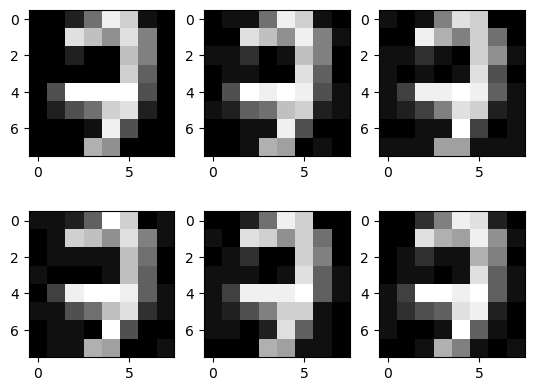

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3)
ax[0][0].imshow(x.reshape((8, 8)), cmap="gray")
ax[0][1].imshow(x0.reshape((8, 8)), cmap="gray")
ax[0][2].imshow(x2.reshape((8, 8)), cmap="gray")
ax[1][0].imshow(x3.reshape((8, 8)), cmap="gray")
ax[1][1].imshow(x4.reshape((8, 8)), cmap="gray")
ax[1][2].imshow(x7.reshape((8, 8)), cmap="gray")

In [11]:
res, cexs = query.multiclass_robustness_query_many(rf, test_X[0:25], delta, 0, 16)
print(f"True: {len(res[0])}")
print(f"False: {len(res[1])}")
print(f"None: {len(res[2])}")

True: 17
False: 3
None: 5


In [29]:
res, cexs = query.multiclass_robustness_query_many(gb, test_X[0:25], delta, 0, 16)
cexs = np.round(cexs)
print(f"True: {len(res[0])}")
print(f"False: {len(res[1])}")
print(f"None: {len(res[2])}")

True: 15
False: 9
None: 1


In [30]:
print(gb.eval(np.array(res[1])))
print(gb.eval(np.array(cexs)))
print(gb.eval(np.array(res[1]), True))
print(gb.eval(np.array(cexs), True))

[1 7 0 5 9 7 1 7 6]
[2 2 2 9 2 2 2 2 4]
[[0.     0.9818 0.0005 0.0021 0.0012 0.0016 0.0004 0.0003 0.0106 0.0015]
 [0.     0.     0.     0.     0.     0.     0.     0.9999 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0001 0.0031 0.0005 0.0019 0.0024 0.8258 0.0003 0.0014 0.0018 0.1626]
 [0.0003 0.0047 0.0047 0.021  0.0073 0.0506 0.0005 0.0039 0.0128 0.8941]
 [0.     0.0008 0.0005 0.0037 0.0016 0.0006 0.0002 0.9706 0.0075 0.0145]
 [0.     0.9991 0.0005 0.     0.     0.0002 0.     0.     0.0001 0.    ]
 [0.     0.0002 0.0006 0.0003 0.0001 0.0001 0.     0.9965 0.002  0.0002]
 [0.     0.     0.     0.     0.     0.0001 0.9993 0.     0.0006 0.    ]]
[[0.     0.0114 0.9083 0.002  0.052  0.002  0.0005 0.0003 0.0216 0.0018]
 [0.     0.0028 0.7167 0.0102 0.006  0.0101 0.0002 0.1535 0.0853 0.0152]
 [0.0223 0.0014 0.9469 0.0054 0.0111 0.0006 0.0002 0.0007 0.0032 0.0083]
 [0.0007 0.056  0.0046 0.0242 0.0695 0.0089 0.0022 0.0339 0.0382 0.7617]
 [0.0001 0

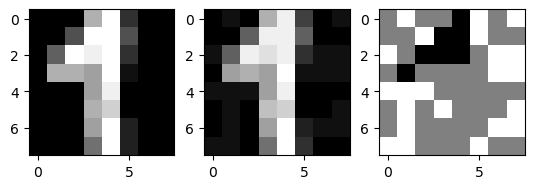

In [31]:
i = 0

original = res[1][i].reshape((8, 8))
perturbed = cexs[i].reshape((8, 8))

fig, ax = plt.subplots(1, 3)
ax[0].imshow(original, cmap="gray")
ax[1].imshow(perturbed, cmap="gray")
ax[2].imshow(perturbed - original, cmap="gray")

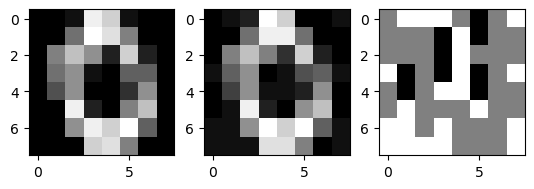

In [32]:
i = 2

original = res[1][i].reshape((8, 8))
perturbed = cexs[i].reshape((8, 8))

fig, ax = plt.subplots(1, 3)
ax[0].imshow(original, cmap="gray")
ax[1].imshow(perturbed, cmap="gray")
ax[2].imshow(perturbed - original, cmap="gray")